# Visualization of the deggresive claiming process

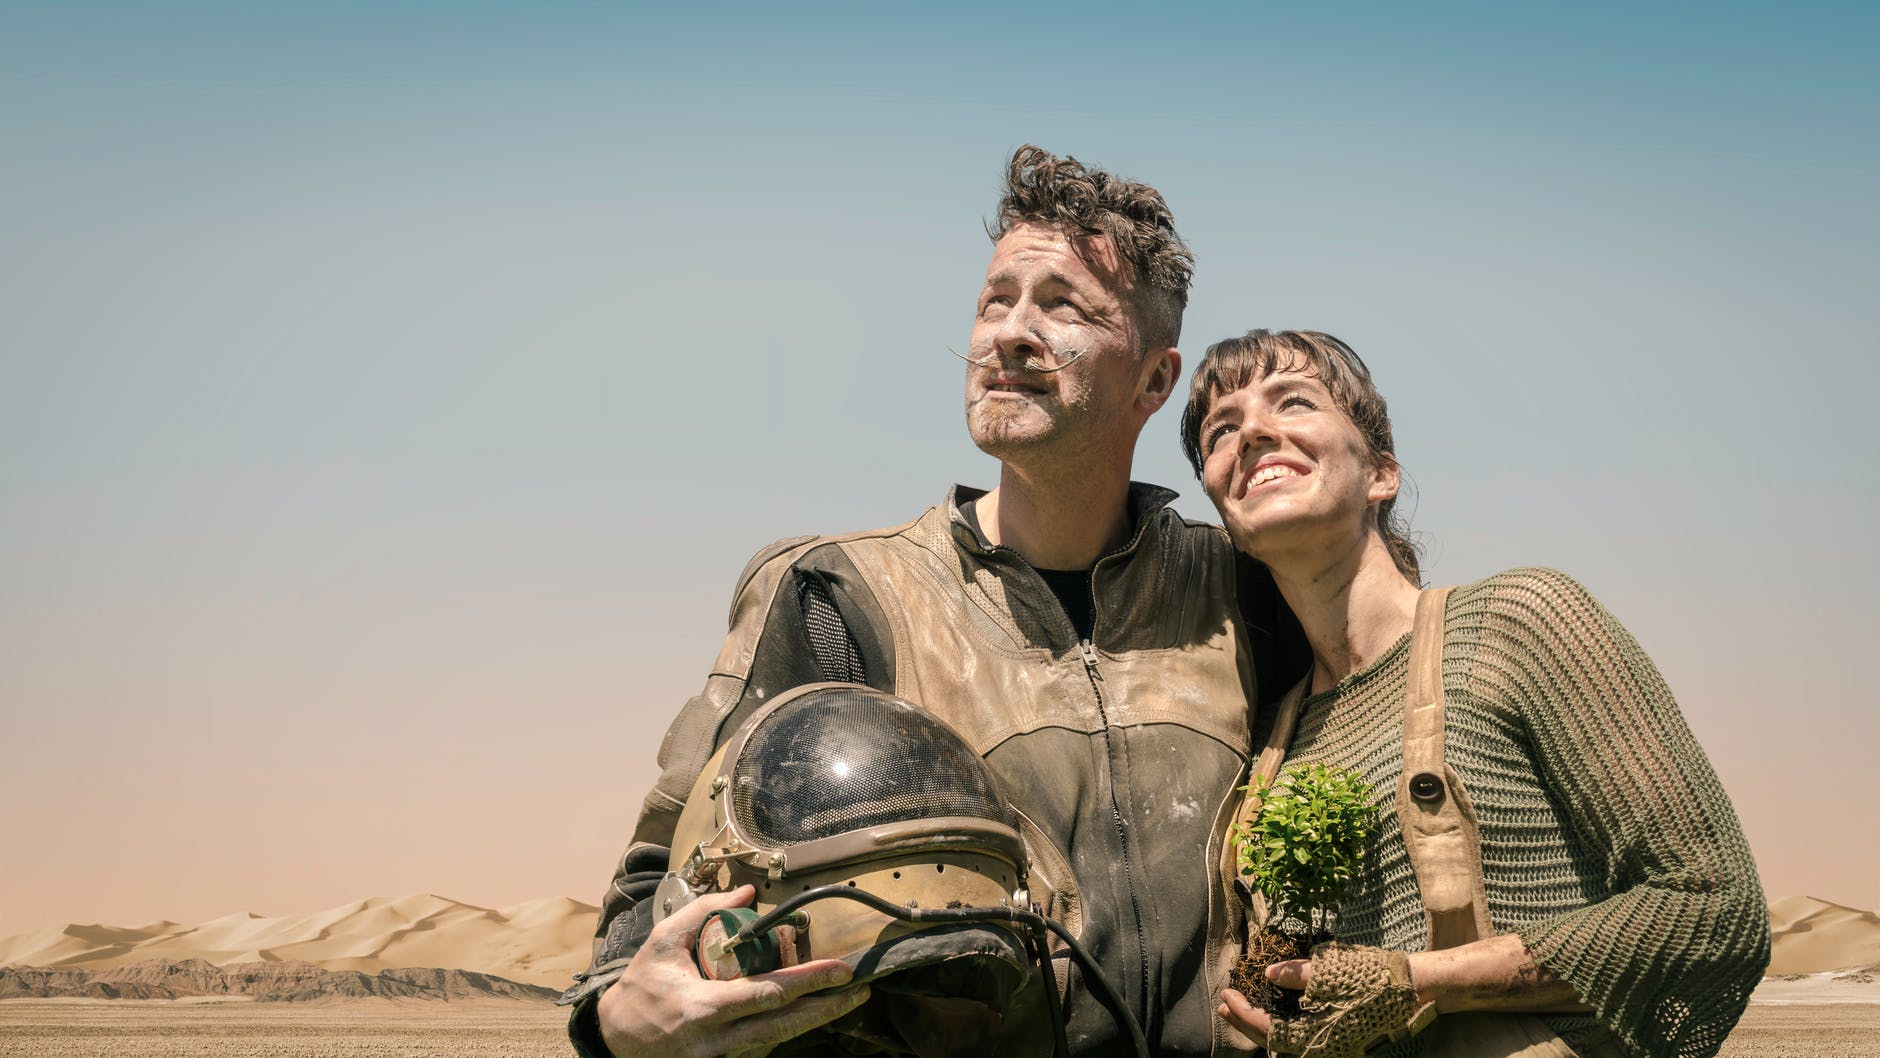

In [2]:
from IPython.display import Image
Image("../future.jpeg")

In [171]:
import matplotlib.pyplot as plt

In [249]:
def plot_developement(squareN= 144000000, first_claim = 1440000, deg= 0.99, nClaims= 100,claimSplit= True):
    claims = []
    for x in range(nClaims): 
        claims.append(first_claim)
        first_claim = first_claim * deg
        if sum(claims) >= squareN: 
            nClaims = x+1
            print("All squares distributed before the max claims were reached!")
            break
            
    X = list(range(0, nClaims))
    fig, axs = plt.subplots(1, 2, constrained_layout=True,figsize=(10,10))
    axs[0].bar(X,claims, width=1,align = "edge")
    axs[0].plot(X,claims,color="red")
    
    if claimSplit: 
        labels = 'First Ten', '10-100', '101-' + str(nClaims), 'Unclaimed'
        ten = sum(claims[:10]) / squareN
        hundred = sum(claims[10:100]) / squareN
        rest = sum(claims[100:]) / squareN
        remain = max(1-(ten+hundred+rest),0)
        sizes = [ten,hundred,rest, remain]
        explode = (0,0,0,0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
        
    else: 
        labels = 'claimed', 'Unclaimed'
        owned = sum(claims) / squareN

        sizes = [owned, 1-owned]
        explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
        
        
    axs[1].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    
    axs[1].axis('equal')  
    axs[0].set_title('Square shares')
    axs[0].set_xlabel('claim')
    axs[0].set_ylabel('Squares')
    fig.suptitle('degressive claim developement', fontsize=16)
    axs[1].set_title('unclaimed/claimed after ' + str(nClaims) + ' claims')

    plt.show()

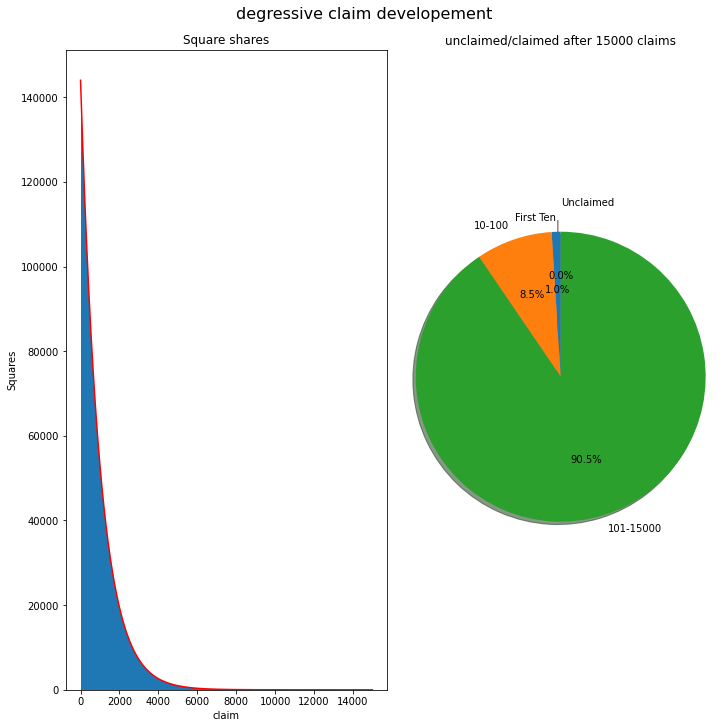

In [251]:
plot_developement(squareN= 144000000, first_claim = 144000, deg= 0.999, nClaims= 15000,claimSplit= True)